In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:800px !important; }</style>"))

# Plot dei dati di un dataframe
In questo blog vogliamo mostrare come trattare un dataframe per le comuni operazioni di plotting dei dati

## Dataframe semplice 

In [1]:
# importa le librerie
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
giorni    =   ['10/01/2019',  '11/01/2019','12/01/2019','13/01/2019','14/01/2019' ]
citta=['Milano']
data=[]
localita=[]
sensore=[]
valmin=[]
valmax=[]
for g in giorni:
    for c in citta:
        data.append(g)
        localita.append(c)
        sensore.append('Temperatura')
        valmin.append(np.random.randint(0,5))
        valmax.append(np.random.randint(10,20))

tabella={'data':data,'localita':localita,'sensore':sensore,'valmin':valmin,'valmax':valmax}
df=pd.DataFrame(tabella)
df['data']=pd.to_datetime(df['data'],format='%d/%m/%Y')
df['data']=df['data'].dt.strftime('%d/%m/%Y')
display(df)

,data,localita,sensore,valmin,valmax
0,10/01/2019,Milano,Temperatura,3,18
1,11/01/2019,Milano,Temperatura,0,18
2,12/01/2019,Milano,Temperatura,1,18
3,13/01/2019,Milano,Temperatura,0,15
4,14/01/2019,Milano,Temperatura,0,15


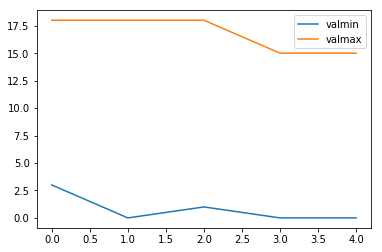

In [3]:
df.plot()

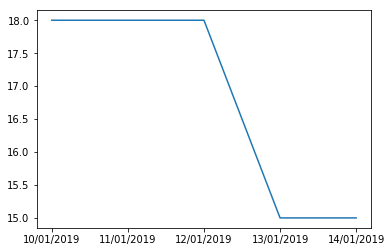

In [4]:

fig, ax = plt.subplots()
ax.plot(df.data,df.valmax)


# DataFrame piu complesso (da gestire group by)

In [5]:
giorni    =   ['10/01/2019',  '11/01/2019','12/01/2019' ]
citta=['Milano','Torino']
data=[]
localita=[]
sensore=[]
valmin=[]
valmax=[]
for g in giorni:
    for c in citta:
        data.append(g)
        localita.append(c)
        sensore.append('Pressione')
        valmin.append(np.random.randint(980,990))
        valmax.append(np.random.randint(990,1000))
        data.append(g)
        localita.append(c)
        sensore.append('Temperatura')
        valmin.append(np.random.randint(0,5))
        valmax.append(np.random.randint(6,15))

tabella={'data':data,'localita':localita,'sensore':sensore,'valmin':valmin,'valmax':valmax}
df=pd.DataFrame(tabella)
df['data']=pd.to_datetime(df['data'],format='%d/%m/%Y')
df['data']=df['data'].dt.strftime('%d/%m/%Y')
display(df)

,data,localita,sensore,valmin,valmax
0,10/01/2019,Milano,Pressione,988,992
1,10/01/2019,Milano,Temperatura,4,10
2,10/01/2019,Torino,Pressione,984,992
3,10/01/2019,Torino,Temperatura,2,12
4,11/01/2019,Milano,Pressione,986,999
5,11/01/2019,Milano,Temperatura,2,6
6,11/01/2019,Torino,Pressione,989,990
7,11/01/2019,Torino,Temperatura,4,11
8,12/01/2019,Milano,Pressione,982,990
9,12/01/2019,Milano,Temperatura,2,14


sensore
Pressione      AxesSubplot(0.125,0.125;0.775x0.755)
Temperatura    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

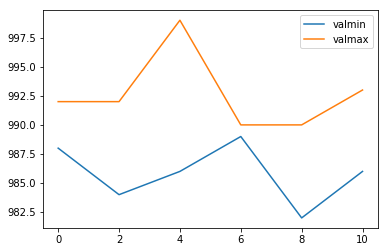

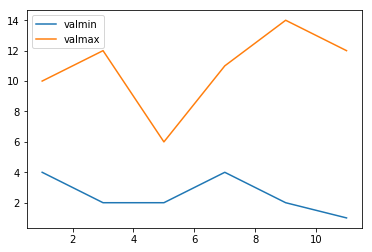

In [6]:
df.groupby('sensore').plot()

In [8]:
gb=df.groupby(['data','localita','sensore'])
df2=gb.valmin.mean().unstack([1,2])
display(df2)
print(df2.index)

localita      Milano                Torino            
sensore    Pressione Temperatura Pressione Temperatura
data                                                  
10/01/2019       988           4       984           2
11/01/2019       986           2       989           4
12/01/2019       982           2       986           1

Index(['10/01/2019', '11/01/2019', '12/01/2019'], dtype='object', name='data')


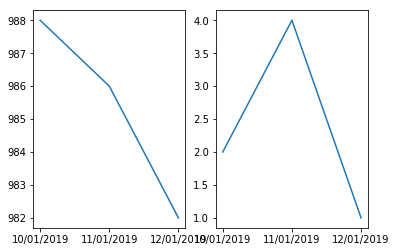

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(df2.index,df2.Milano.Pressione)
axes[1].plot(df2.index,df2['Torino']['Temperatura'])

#df2['Pressione'].plot(df2.index,ax=axes[0])
#df2['Temperatura'].plot(ax=axes[1])

## Formattiamo le label dell'asse x di formato DATA, e le ruotiamo

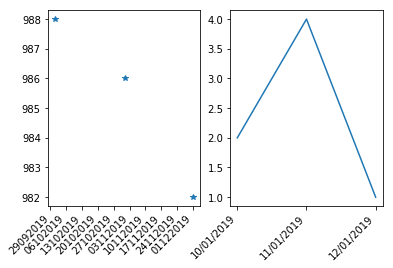

In [10]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

frmtY = DateFormatter('%d%m%Y')
fig, (ax1,ax2) = plt.subplots(1, 2)
ax1.xaxis_date()

ax1.plot_date( pd.to_datetime(df2.index),df2.Milano.Pressione,'*')
fig.autofmt_xdate(rotation=45)
ax1.xaxis.set_major_formatter(frmtY)
ax2.plot(df2.index,df2['Torino']['Temperatura'])



Come si vede ci sono le date per ogni punto piu degli interspazi che non ci servono.

Il grafico a sinistar utilizza plot_date(....), che mi consente di formattare la data 

il grafico a destra invece utilizza plot, e mi plotta i dati come stringa


In [11]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


formatter = DateFormatter('%Y-%m-%d %H:%M:%S')
axes[0].xaxis.set_major_formatter(formatter)

gb=df.groupby(['data','localita','sensore'])
df2=gb.valmin.mean().unstack([1,2])
display(df2)
print(df2.index)
print(df2.columns)
milano=df2[df2.columns.levels[0][0]]
print('df2.columns.levels[0]',df2.columns.levels[0])
print('df2.columns.levels[0][0]',df2.columns.levels[0][0])
display(milano)
print(milano.index)
pd.to_datetime(milano.index,format="%d/%m/%Y")


localita      Milano                Torino            
sensore    Pressione Temperatura Pressione Temperatura
data                                                  
10/01/2019       988           4       984           2
11/01/2019       986           2       989           4
12/01/2019       982           2       986           1

Index(['10/01/2019', '11/01/2019', '12/01/2019'], dtype='object', name='data')
MultiIndex(levels=[['Milano', 'Torino'], ['Pressione', 'Temperatura']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['localita', 'sensore'])
df2.columns.levels[0] Index(['Milano', 'Torino'], dtype='object', name='localita')
df2.columns.levels[0][0] Milano


sensore,Pressione,Temperatura
data,,
10/01/2019,988,4
11/01/2019,986,2
12/01/2019,982,2


Index(['10/01/2019', '11/01/2019', '12/01/2019'], dtype='object', name='data')


DatetimeIndex(['2019-01-10', '2019-01-11', '2019-01-12'], dtype='datetime64[ns]', name='data', freq=None)

In [12]:

# format the coords message box
def price(x):
    return 'A'

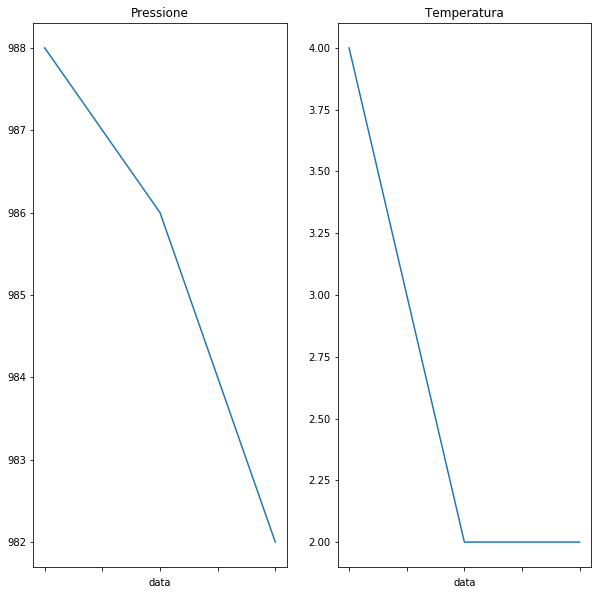

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
#axes[0].xaxis.set_major_formatter(formatter)

milano['Pressione'].plot(ax=axes[0],title='Pressione')
milano['Temperatura'].plot(ax=axes[1],title='Temperatura')
plt.show()

# HISTOGRAMMI
* DataFrame.hist()
* DataFrame.plot(kind='bar')
* AxesSubplot.bar(DataFrame.index, DataFrame[column])

### Un istogramma rappresenta una distribuzione dei dati.

In [27]:
import pandas as pd
dates=['01/01/2019','01/01/2019','02/02/2019','11/10/2019','4/11/2019']
val1=[11,11,12,13,14]
val2=[21,23,22,23,24]
dfmi = pd.DataFrame({'data':dates,'val1':val1,'val2':val2})
display(dfmi)

,data,val1,val2
0,01/01/2019,11,21
1,01/01/2019,11,23
2,02/02/2019,12,22
3,11/10/2019,13,23
4,4/11/2019,14,24


Nella tabella sopra possiamo vedere che val1 c'e' una frequenza maggiore di 11 ( 2 valori)

e nella colonna val2 c'e' una frequenza di due volte 23.

## DataFrame.hist()

DataFrame.hist() plotta per ogni colonna la distribuzione di valori.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33aae886d8>,
      dtype=object)

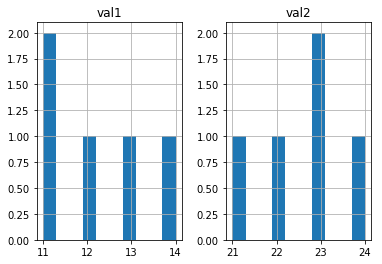

In [28]:
dfmi.hist()

## DataFrame.plot(kind='bar')

In questo caso i dati vengono raggruppati in base all'indice .

,data,val1,val2
0,01/01/2019,11,21
1,01/01/2019,11,23
2,02/02/2019,12,22
3,11/10/2019,13,23
4,4/11/2019,14,24


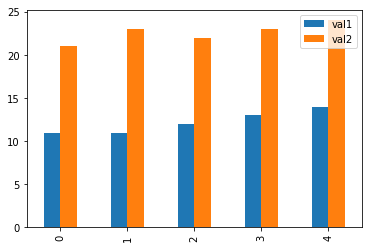

In [30]:
import pandas as pd
dates=['01/01/2019','01/01/2019','02/02/2019','11/10/2019','4/11/2019']
val1=[11,11,12,13,14]
val2=[21,23,22,23,24]
dfmi = pd.DataFrame({'data':dates,'val1':val1,'val2':val2})
display(dfmi)
dfmi.plot(kind='bar')


,data,val1,val2
0,01/01/2019,11,21
1,01/01/2019,11,23
2,02/02/2019,12,22
3,11/10/2019,13,23
4,4/11/2019,14,24


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33aa768ac8>,
      dtype=object)

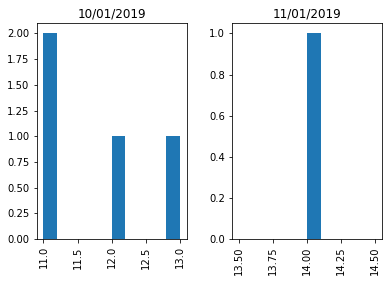

In [36]:
import pandas as pd
dates=['01/01/2019','01/01/2019','02/02/2019','11/10/2019','4/11/2019']
val1=[11,11,12,13,14]
val2=[21,23,22,23,24]
dfmi = pd.DataFrame({'data':dates,'val1':val1,'val2':val2})
display(dfmi)
#gb=dfmi.groupby('data')
#gb.hist()
dfmi['val1'].hist(by=df['data'])


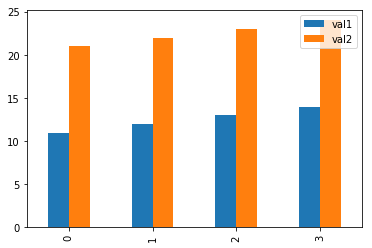

In [17]:
fig, ax = plt.subplots()
dfmi.plot(ax=ax,kind='bar')

## AxesSubplot.bar(..)

<BarContainer object of 4 artists>

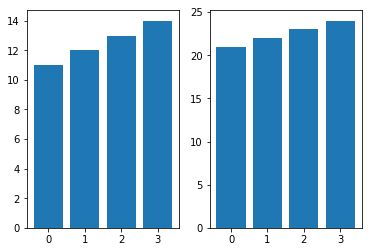

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.bar(dfmi.index,dfmi['val1'])
ax2.bar(dfmi.index,dfmi['val2'])

*** PLOTTANDO SUGLI STESSI ASSI VENGONO SOVRAPPOSTI ***

<BarContainer object of 4 artists>

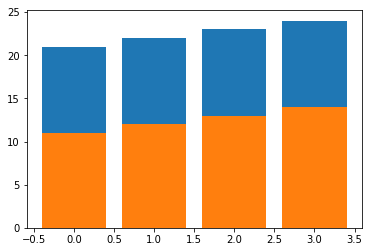

In [19]:
fig, ax = plt.subplots()
ax.bar(dfmi.index,dfmi['val2'])
ax.bar(dfmi.index,dfmi['val1'])


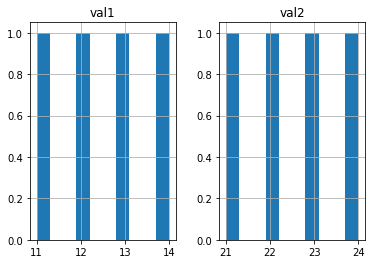

In [20]:
x=dfmi.hist()
\